In [1]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
file_path = "Retail_Transactions_Dataset.csv"

###  1. Reading Speed: CSV Loading

In [3]:
start = time.time()
df_pandas = pd.read_csv(file_path)
pandas_time = time.time() - start


start = time.time()
df_polars = pl.read_csv(file_path)
polars_time = time.time() - start

print(f"Pandas load time: {pandas_time:.2f}s")
print(f"Polars load time: {polars_time:.2f}s")

Pandas load time: 1.32s
Polars load time: 0.09s


In [14]:
# Display brief information about the CSV file
print("CSV File Information:")
print(f"Number of rows: {df_polars.height}")
print(f"Number of columns: {df_polars.width}")
print("\nColumn Names and Data Types:")
print(df_polars.schema)  # Display column names and their data types
print("\nFirst 5 Rows of the DataFrame:")
print(df_polars.head(5))  # Display the first 5 rows

# Additional summary statistics
print("\nDataFrame Summary Statistics:")
print(df_polars.describe())

CSV File Information:
Number of rows: 1000000
Number of columns: 13

Column Names and Data Types:
Schema({'Transaction_ID': Int64, 'Date': String, 'Customer_Name': String, 'Product': String, 'Total_Items': Int64, 'Total_Cost': Float64, 'Payment_Method': String, 'City': String, 'Store_Type': String, 'Discount_Applied': Boolean, 'Customer_Category': String, 'Season': String, 'Promotion': String})

First 5 Rows of the DataFrame:
shape: (5, 13)
┌────────────┬────────────┬───────────┬───────────┬───┬───────────┬───────────┬────────┬───────────┐
│ Transactio ┆ Date       ┆ Customer_ ┆ Product   ┆ … ┆ Discount_ ┆ Customer_ ┆ Season ┆ Promotion │
│ n_ID       ┆ ---        ┆ Name      ┆ ---       ┆   ┆ Applied   ┆ Category  ┆ ---    ┆ ---       │
│ ---        ┆ str        ┆ ---       ┆ str       ┆   ┆ ---       ┆ ---       ┆ str    ┆ str       │
│ i64        ┆            ┆ str       ┆           ┆   ┆ bool      ┆ str       ┆        ┆           │
╞════════════╪════════════╪═══════════╪═══════════

### 2. Filtering Rows Based on Conditions

In [5]:
start = time.time()
filtered_pandas = df_pandas[df_pandas['Total_Cost'] > 500]
pandas_filter_time = time.time() - start

start = time.time()
filtered_polars = df_polars.filter(pl.col("Total_Cost") > 500)
polars_filter_time = time.time() - start

print(f"Pandas filter time: {pandas_filter_time:.4f}s")
print(f"Polars filter time: {polars_filter_time:.4f}s")


Pandas filter time: 0.0046s
Polars filter time: 0.0311s


### 3. Aggregations: Group By and Summing

In [9]:
start = time.time()
grouped_pandas = df_pandas.groupby("City")["Total_Cost"].sum()
pandas_groupby_time = time.time() - start

start = time.time()
grouped_polars = df_polars.group_by("City").agg(pl.col("Total_Cost").sum())
polars_groupby_time = time.time() - start


print(f"Pandas groupby time: {pandas_groupby_time:.4f}s")
print(f"Polars groupby time: {polars_groupby_time:.4f}s")


Pandas groupby time: 0.0749s
Polars groupby time: 0.0476s


### 4. Merging DataFrames

In [10]:
pandas_df1 = df_pandas[["Customer_Name", "Total_Cost"]]
pandas_df2 = df_pandas[["Customer_Name", "Total_Items"]]

polars_df1 = df_polars.select(["Customer_Name", "Total_Cost"])
polars_df2 = df_polars.select(["Customer_Name", "Total_Items"])

start = time.time()
merged_pandas = pd.merge(pandas_df1, pandas_df2, on="Customer_Name")
pandas_merge_time = time.time() - start

start = time.time()
merged_polars = polars_df1.join(polars_df2, on="Customer_Name")
polars_merge_time = time.time() - start

print(f"Pandas merge time: {pandas_merge_time:.4f}s")
print(f"Polars merge time: {polars_merge_time:.4f}s")


Pandas merge time: 0.9131s
Polars merge time: 0.2701s


### 5. Memory Usage

In [11]:
pandas_memory = df_pandas.memory_usage(deep=True).sum()
polars_memory = df_polars.estimated_size()

print(f"Pandas memory usage: {pandas_memory / 1024**2:.2f} MB")
print(f"Polars memory usage: {polars_memory / 1024**2:.2f} MB")


Pandas memory usage: 564.93 MB
Polars memory usage: 150.22 MB


### 6. Writing Data Back to Disk

In [12]:
start = time.time()
df_pandas.to_csv("pandas_output.csv", index=False)
pandas_write_time = time.time() - start

start = time.time()
df_polars.write_csv("polars_output.csv")
polars_write_time = time.time() - start

print(f"Pandas write time: {pandas_write_time:.2f}s")
print(f"Polars write time: {polars_write_time:.2f}s")


Pandas write time: 2.23s
Polars write time: 0.34s


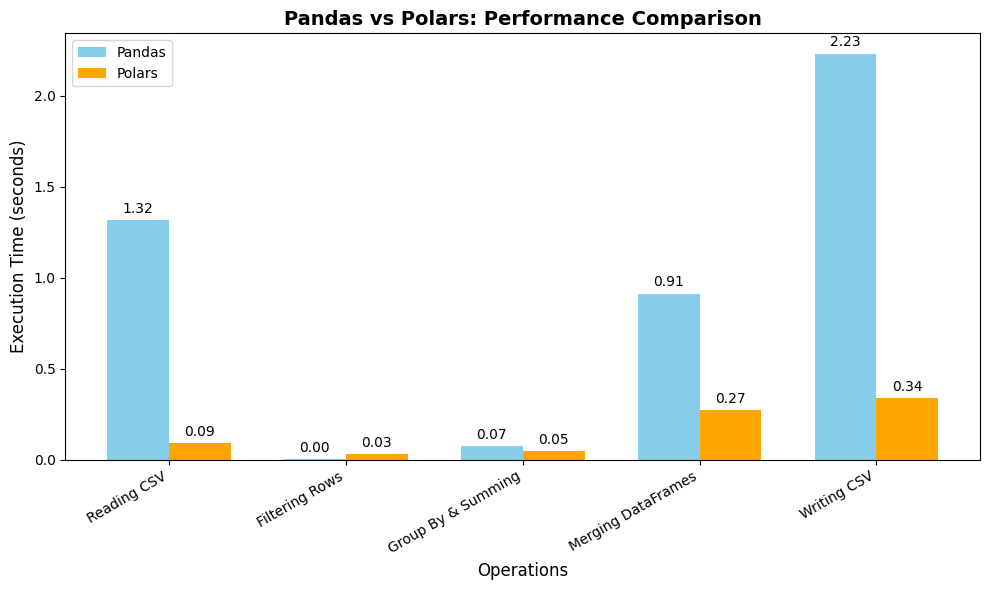

In [13]:
operations = ["Reading CSV", "Filtering Rows", "Group By & Summing", "Merging DataFrames", "Writing CSV"]
pandas_times = [pandas_time, pandas_filter_time, pandas_groupby_time, pandas_merge_time, pandas_write_time]  
polars_times = [polars_time, polars_filter_time, polars_groupby_time, polars_merge_time, polars_write_time]  

# Create bar chart
x = np.arange(len(operations))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
pandas_bars = ax.bar(x - width / 2, pandas_times, width, label="Pandas", color="skyblue")
polars_bars = ax.bar(x + width / 2, polars_times, width, label="Polars", color="orange")

ax.set_xlabel("Operations", fontsize=12)
ax.set_ylabel("Execution Time (seconds)", fontsize=12)
ax.set_title("Pandas vs Polars: Performance Comparison", fontsize=14, weight="bold")
ax.set_xticks(x)
ax.set_xticklabels(operations, rotation=30, ha="right")
ax.legend()


for bars in [pandas_bars, polars_bars]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()
